##**Classification Regression Model Performance**##

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

cancer_df = datasets.load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_df.data, cancer_df.target,
                                                    test_size =0.2,
random_state = 111)

cancer_prediction_model = LogisticRegression()
cancer_prediction_model.fit(X_train, Y_train)

prediction_train = cancer_prediction_model.predict(X_train)
prediction_test = cancer_prediction_model.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(Y_train, prediction_train)
confusion_matrix_test = confusion_matrix(Y_test, prediction_test)
print("Confusion Matrix (Train Datas)", "-"*30, confusion_matrix_train, sep="\n")
print("Confusion Matrix (Test Datas","-"*30, confusion_matrix_test, sep="\n")


Confusion Matrix (Train Datas)
------------------------------
[[154  14]
 [ 10 277]]
Confusion Matrix (Test Datas
------------------------------
[[40  4]
 [ 2 68]]


Accuracy

In [5]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("True negative number :", TN)
print("True positive number :", TP)
print("False positive number :", FP)
print("False negative number :", FN)

True negative number : 40
True positive number : 68
False positive number : 4
False negative number : 2


In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy number from model : ", cancer_prediction_model.score(X_test, Y_test))
print("Calculated accuracy number : ", (TN + TP)/(FN + FP + TN + TP))
print("Accuracy_score() number :", accuracy_score(Y_test, prediction_test))

Accuracy number from model :  0.9473684210526315
Calculated accuracy number :  0.9473684210526315
Accuracy_score() number : 0.9473684210526315


Precision

In [12]:
from sklearn.metrics import precision_score

print("Calculated accurancy number :", (TP)/(FP + TP))
print("precision_score() number :", precision_score(Y_test, prediction_test))

Calculated accurancy number : 0.9444444444444444
precision_score() number : 0.9444444444444444


Recall / Sensitivity

In [13]:
from sklearn.metrics import recall_score

print("Calculated accuracy number :", (TP)/ (TP + FN))
print("recall_score() number :", recall_score(Y_test, prediction_test))

Calculated accuracy number : 0.9714285714285714
recall_score() number : 0.9714285714285714


Specificity

In [14]:
print("Calculated specificity number :", TN/(TN + FP))

Calculated specificity number : 0.9090909090909091


F1 Score

In [19]:
from sklearn.metrics import f1_score

precision_number = precision_score(Y_test, prediction_test)
recall_number = recall_score(Y_test, prediction_test)

print("Calculated f1 score :", 2 * ((precision_number * recall_number)/(precision_number + recall_number)))
print("f1_score() number :", f1_score(Y_test, prediction_test))

Calculated f1 score : 0.9577464788732395
f1_score() number : 0.9577464788732395


In [20]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test, prediction_test))

print("f1_score() number    : {:2f}".format(f1_score(Y_test, prediction_test)))
print("recall_score() number : {:2f}".format(recall_score(Y_test, prediction_test)))
print("precision_score() : {:2f}".format(precision_score(Y_test, prediction_test)))
print("\n")

metrics = precision_recall_fscore_support(Y_test, prediction_test)
print("precision :", metrics[0])
print("recall :", metrics[1])
print("F1 score :", metrics[2])

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.94      0.97      0.96        70

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

f1_score() number    : 0.957746
recall_score() number : 0.971429
precision_score() : 0.944444


precision : [0.95238095 0.94444444]
recall : [0.90909091 0.97142857]
F1 score : [0.93023256 0.95774648]


ROC Curve and AUC values

In [21]:
prediction_test_probabilty = cancer_prediction_model.predict_proba(X_test)[:,1]

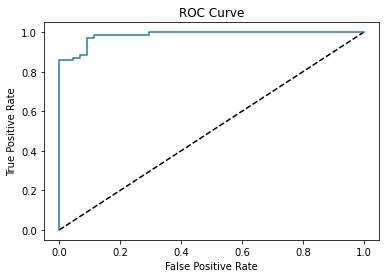

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(Y_test, prediction_test_probabilty)

import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [24]:
print("AUC Value :", roc_auc_score(Y_test, prediction_test_probabilty))

AUC Value : 0.9847402597402598


Precision Recall Curve

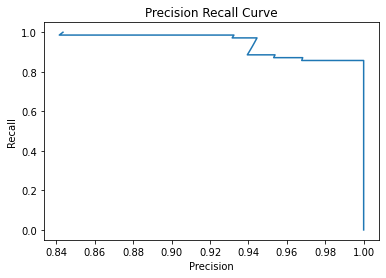

In [26]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, prediction_test_probabilty)

plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.show()

Log-Loss

In [27]:
from sklearn.metrics import log_loss

print("Log-loss :", log_loss(Y_test, prediction_test_probabilty))
print("Error rate :", 1-accuracy_score(Y_test, prediction_test))

Log-loss : 0.15384548197854003
Error rate : 0.052631578947368474
